## Index

#### <a href='#corr'> Pearson Correlation</a>

#### <a href='#vis'> Visualize Correlations</a>

#### <a href='#outliers'> Check for Outliers</a>

In [2]:
#import the appropriate dependencies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_name = './data/knn_cleaned.csv'
df = pd.read_csv(file_name)

### <span id='corr'> Pearson Correlation </span>

<AxesSubplot:>

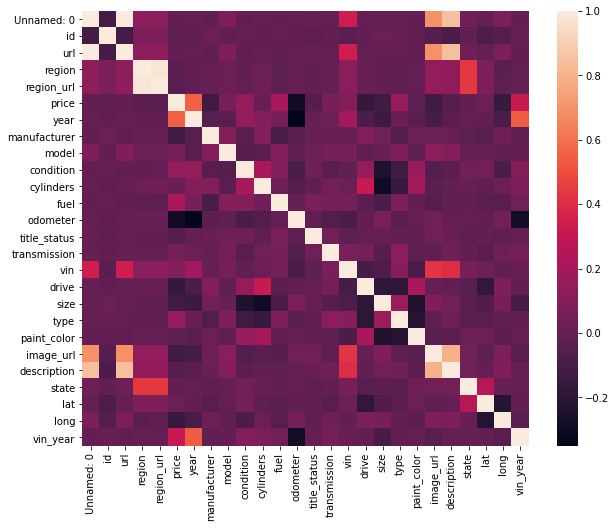

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()) # the lighter the square, the stronger the correlation

### <span id='vis'> Visualize Correlations </span>

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

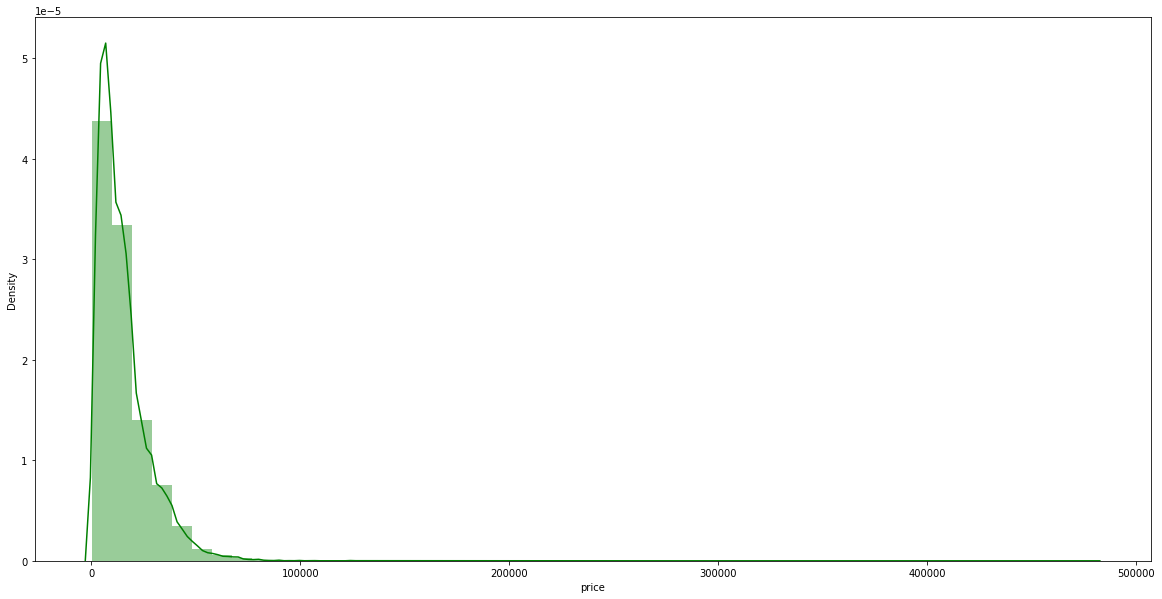

In [73]:
# set the plot size to be larger and more readable
plt.figure(figsize=(20,10))

sns.distplot(df.price, color='green')

##### Price vs Year

In [76]:
# Show boxplot or violin plot of price by individual year


<AxesSubplot:xlabel='year', ylabel='price'>

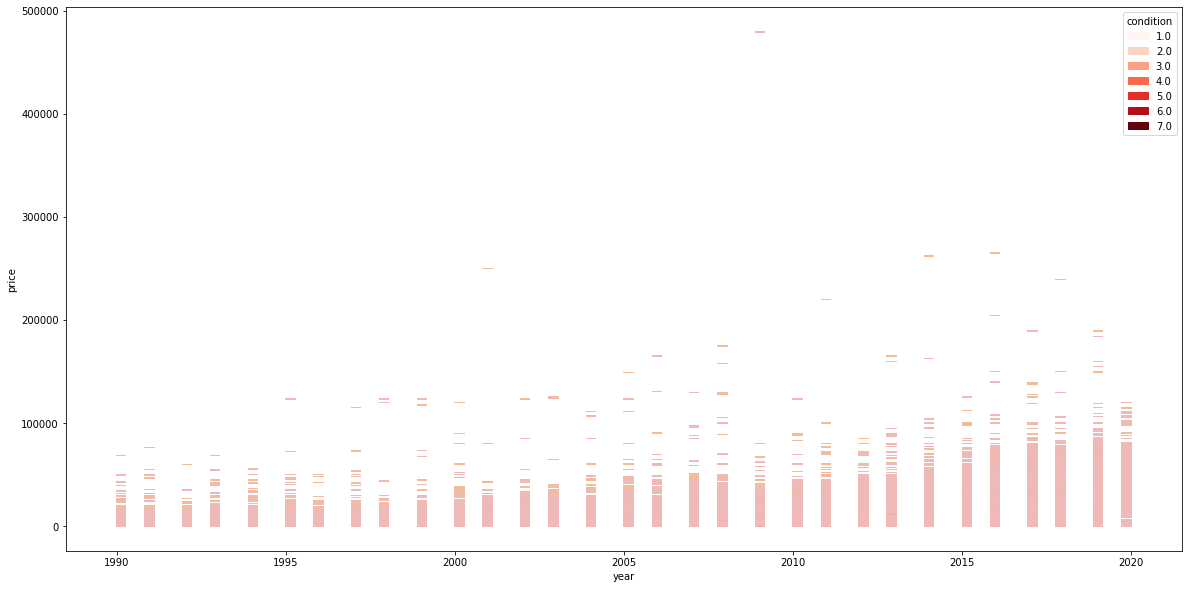

In [77]:
# set the plot size to be larger and more readable
plt.figure(figsize=(20,10))

# Plot a histogram to visualize price in relation to the year
sns.histplot(y='price', x='year',data=df.drop(df.loc[df.price>500000,:].index, axis=0),
             hue='condition', palette='Reds')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

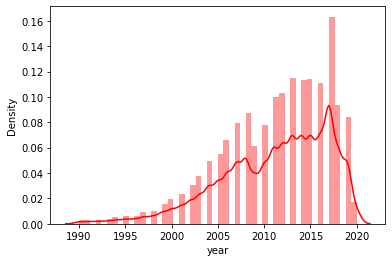

In [82]:
# visualize the number of vehicles per year
sns.distplot(df.year, color='red')

##### Price vs Odometer

<AxesSubplot:xlabel='price', ylabel='odometer'>

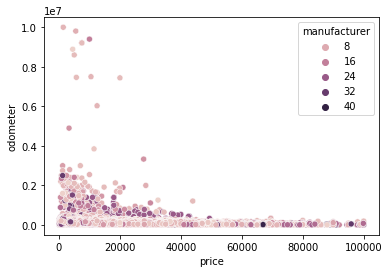

In [44]:
sns.scatterplot(x='price',y='odometer', data = df.drop(df.loc[df.price>100000,:].index, axis=0), hue='manufacturer')

In [ ]:
# set the plot size to be larger and more readable
plt.figure(figsize=(20,10))

# superficial real world experience tells us that some brands are more expensive than other.
sns.boxplot(x='year', y='price', data=df, width=25)

### <span id='outliers'> Check for Outliers </span>

In [12]:
# Define the condition
no_id = (df.columns != 'id')
no_odo = (df.columns != 'odometer')
condition = no_id & no_odo

# define the data to plot
box = df.loc[:, condition]

Text(0.5, 0, 'Features')

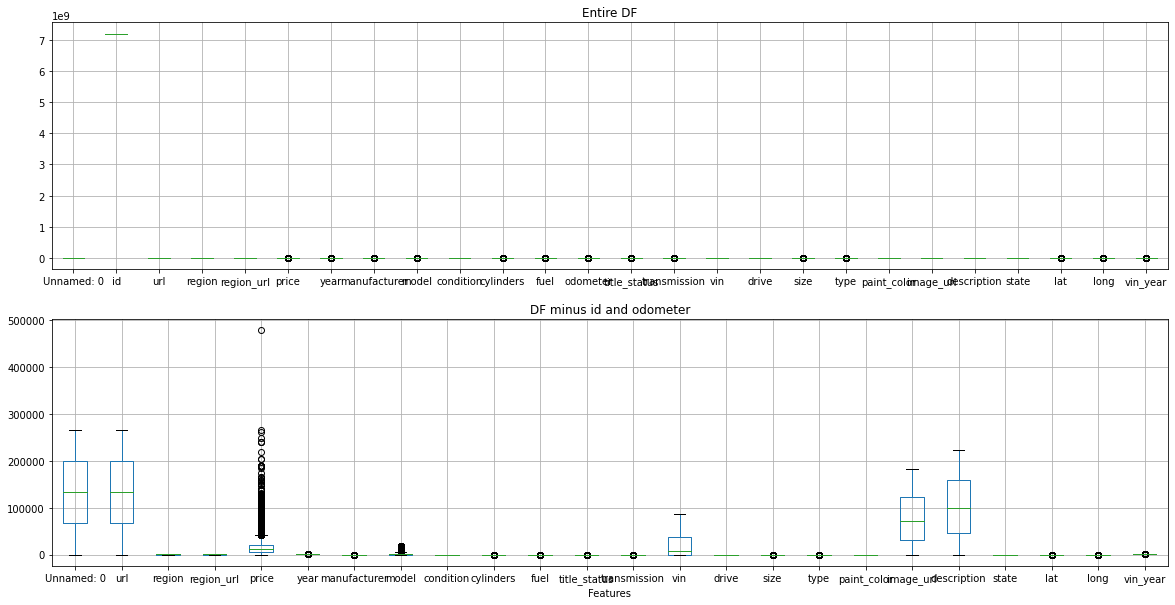

In [13]:
# set the plot size to be larger and more readable
plt.figure(figsize=(20,10))
# plt.figure.suptitle('Visually check for outliers with a boxplot', fontsize=16)

# Boxplot of the entire dataframe
plt.subplot(2, 1, 1)
df.boxplot()
plt.title('Entire DF')

# Boxplot of the data frame without id and odometer because of their size on the scale
plt.subplot(2, 1, 2)
box.boxplot() #df without odometer or id to get a better look at the data
plt.title('DF minus id and odometer')
plt.xlabel('Features')

The boxplots illustrate if there are outliers, which in our case, there are. Also, these boxplots show that the scaling varies greatly across the feature list.
<br> We will standardize the data to account for outliers and to scale the data down to size.

In [26]:
df.describe()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,vin_year
count,266524.00000,2.665240e+05,266524.00000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,...,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000
mean,133261.50000,7.189037e+09,133262.50000,187.294184,194.939278,14876.002458,2011.219928,10.369824,1931.587242,2.837279,...,2.363172,1.587857,3.895454,6.168604,77802.068200,103386.719804,21.214502,38.842864,-93.842509,2012.183665
std,76938.99591,4.752277e+06,76938.99591,118.511650,121.116150,12343.059875,5.807817,7.735832,3285.107890,1.396937,...,1.196066,0.972156,3.086955,2.882979,53138.937859,65095.672467,14.529093,5.931862,17.792101,4.711483
min,0.00000,7.178302e+09,1.00000,1.000000,1.000000,101.000000,1990.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-80.386400,-161.394000,1990.000000
25%,66630.75000,7.185448e+09,66631.75000,71.000000,76.000000,5999.000000,2007.000000,5.000000,119.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,30827.000000,45713.750000,10.000000,35.122200,-106.457000,2009.666667
50%,133261.50000,7.189998e+09,133262.50000,187.000000,197.000000,11900.000000,2012.000000,7.000000,508.000000,4.000000,...,2.000000,1.000000,3.000000,6.000000,71499.500000,99518.500000,17.000000,39.499400,-87.889800,2013.000000
75%,199892.25000,7.193319e+09,199893.25000,285.000000,296.000000,19950.000000,2016.000000,16.000000,2104.000000,4.000000,...,4.000000,2.000000,5.000000,9.000000,122376.250000,159081.250000,33.000000,42.636400,-81.093300,2015.666667
max,266523.00000,7.195225e+09,266524.00000,400.000000,409.000000,479500.000000,2020.000000,41.000000,18148.000000,7.000000,...,4.000000,5.000000,14.000000,13.000000,181951.000000,222667.000000,51.000000,80.383400,115.524000,2019.000000


In [75]:
# standardize the columns individually
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()